<a href="https://colab.research.google.com/github/Drij0586/Quant-Project/blob/main/SMA_crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from nsepy import get_history
from datetime import date
df = get_history(symbol = "NDTV" , start = date(2022,1,1) , end = date(2022,11,30))

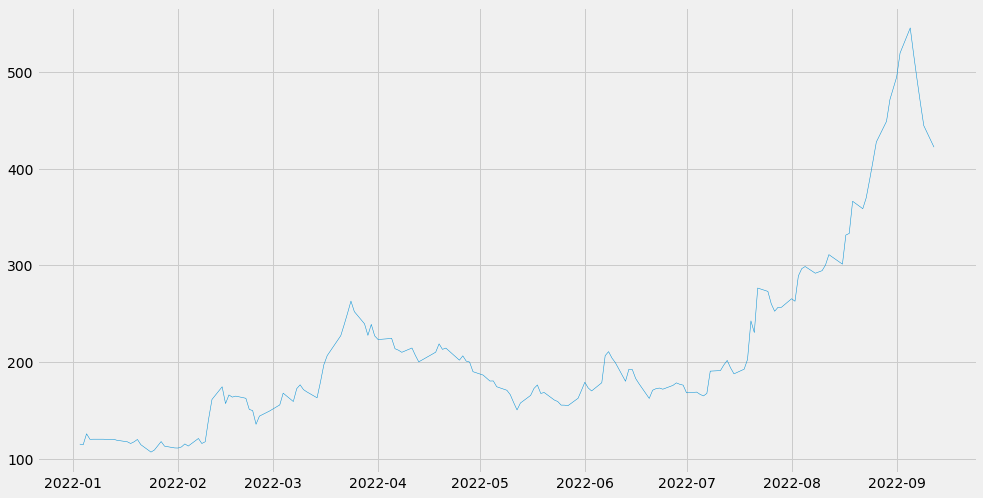

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(df['Close'] , linewidth = 0.5)

In [29]:
SMA20 = pd.DataFrame()
SMA20['Price'] = df['Close'].rolling(window = 10).mean().shift()
SMA50 = pd.DataFrame()
SMA50['Price'] = df['Close'].rolling(window = 15).mean().shift()

Data = pd.DataFrame()
Data['Price'] = df['Close']
Data['SMA10'] = SMA20['Price']
Data['SMA15'] = SMA50['Price']
Data['Funds'] = 100000

In [36]:
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000]*len(data)
  lastFunds = 100000
  flag = 0 #flag 0 for sell  and flag = 1 for buy
  for i in range((len(data))):
    if data['SMA10'][i] > data['SMA15'][i]:
      
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        last_pos = lastFunds/data['Price'][i]
        funds[i] = lastFunds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        lastFunds = data['Price'][i]*last_pos
        funds[i] = lastFunds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)

    elif data['SMA10'][i] < data['SMA15'][i]:

      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        lastFunds = data['Price'][i]*last_pos
        funds[i] = lastFunds
        open_position.append(0)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        funds[i] = lastFunds
        open_position.append(0)
        sell_signal.append(np.NaN)

    else:
      buy_signal.append(np.NaN)
      open_position.append(0)
      sell_signal.append(np.NaN)

  return buy_signal , sell_signal , open_position , funds, flag





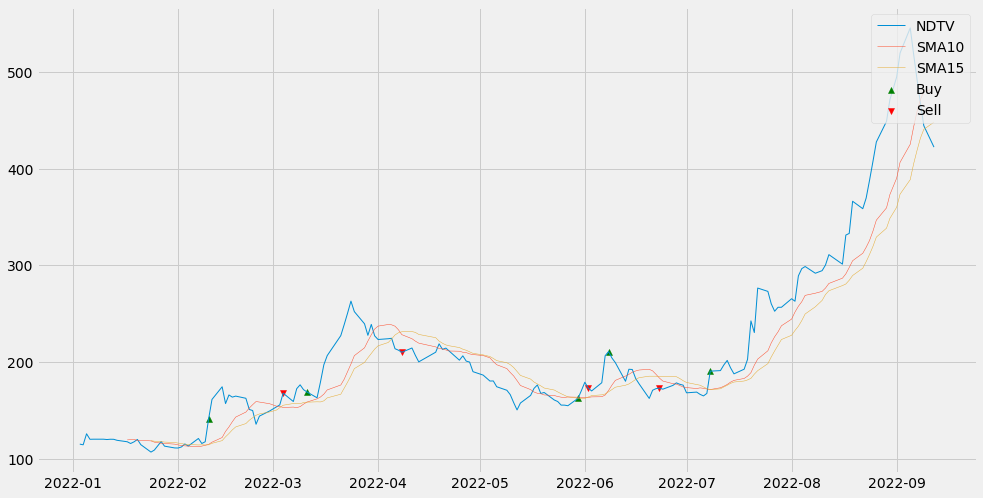

In [37]:
buy_sell = buy_sell_signal(Data)
Data['BuyPrice'] = buy_sell[0]
Data['SellPrice'] = buy_sell[1]
Data['OpenPositions'] = buy_sell[2]
Data['LivePositions'] = Data['OpenPositions'].multiply(Data['Price'])
Data['Funds'] = buy_sell[3]

plt.figure(figsize = (15,8))
plt.plot(Data['Price'] , label = 'NDTV', linewidth = 1 )
plt.plot(Data['SMA10'] , label = 'SMA10' , linewidth = 0.5)
plt.plot(Data['SMA15'] , label = 'SMA15' , linewidth = 0.5)
plt.scatter(Data.index, Data['BuyPrice'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['SellPrice'], label= 'Sell', marker = 'v', color = 'r')
plt.legend(loc = 'upper right')



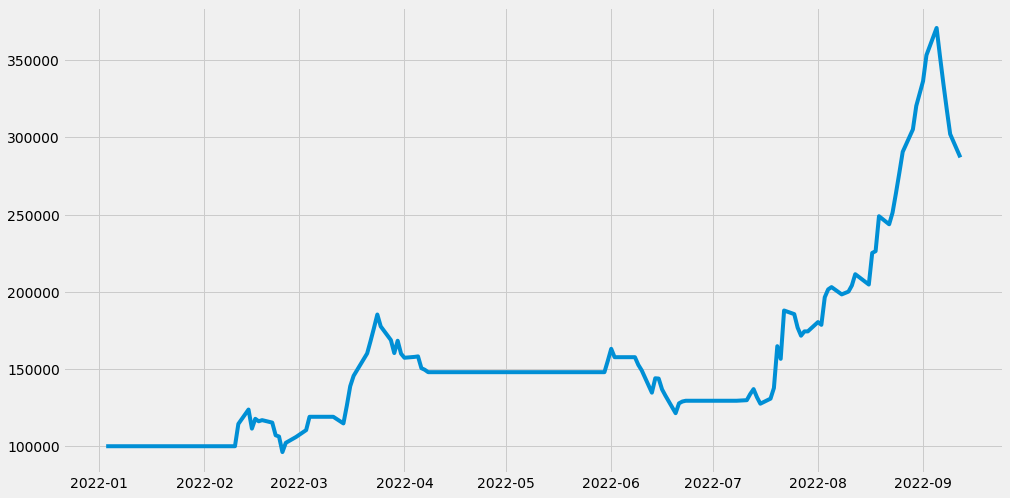

In [38]:
plt.figure(figsize = (15,8))
plt.plot(Data['Funds'])